# Salary Predictor

### Requirements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
import babel.numbers
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

### Global Variables

In [2]:
degree = ["Bachelor's Degree", "Master's Degree", 'PhD']
select  = pd.DataFrame()
final = pd.DataFrame()
x = 0
y = 0
lm = LinearRegression()
exp = 0
x_train=[]
x_test=[]
y_train=[]
y_test=[]
predictions=[]
Experience=0


### Functions

In [3]:
def getJob(Job):
    global select 
    select = full[full['Job']==Job].copy()
    select.drop('jobInt', axis=1, inplace=True)
    widgets.interact(getEdu, Degree=degree)
    
    
def getEdu(Degree):
    global final
    global deg
    if Degree == "Bachelor's Degree":
        deg = 1
    elif Degree == "Master's Degree":
        deg = 2
    elif Degree == "PhD":
        deg = 3
        
    final = select[select['eduInt']==deg].copy()
    final.drop('eduInt', axis=1, inplace=True) 
    
def getExp(Experience=0):
    inn = [Experience]
    ina = np.array(inn)
    sal = lm.predict(ina.reshape(1,-1))
    avgE = metrics.mean_absolute_error(y_test, predictions)
    low = sal[0] - (avgE /2)
    high = sal[0] + (avgE/2)
    
    print('Expected Salary: ' + babel.numbers.format_currency(sal[0], 'USD', locale='en_US'))
    print('Average error: ' + babel.numbers.format_currency(avgE, 'USD', locale='en_US'))
    print()

    print('Approved Salary Range: ' + 
          babel.numbers.format_currency(low, 'USD', locale='en_US') + ' - ' + 
          babel.numbers.format_currency(high, 'USD', locale='en_US'))
    
    

def runModel():
    global final
    global y
    global x
    global lm
    global predictions
    global x_train
    global x_test
    global y_train
    global y_test
    
    y = final['Salary']
    x = final[['Experience']]
    
    x_train, x_test, y_train, y_test = train_test_split(x.values,y, test_size = 0.3, random_state=101)

    lm.fit(x_train, y_train)
    predictions = lm.predict(x_test)
    
ss = widgets.Checkbox(value=False, description='Refresh Plots')
    
def calculateSalary(plot=False):
    widgets.interact(getJob, Job=jobs)
    display(calculate,output)
    calculate.on_click(on_button_clicked)
    widgets.interact(showPlots, plots=ss)
    


def showPlots(plots=False):
    if plots:
        sns.lmplot(x='Experience',y='Salary',data=final)
        sns.pairplot(final)
        sns.jointplot(x='Experience',y='Salary', data=final, kind='hex')


#### Calculation Button

In [4]:
calculate = widgets.Button(description = "Calculate")
output = widgets.Output()

def on_button_clicked(b):
  with output:
    output.clear_output()
    runModel()
    widgets.interact(getExp, Experience=(0,20))
    



## Creating Dataframe

In [5]:
# creates datafram from csv
df = pd.read_csv('salarydata.csv')

# renames columns
df.rename(columns={'title': 'Job', 'basesalary': 'Salary', 'yearsofexperience': 'Experience', 'Education': 'Degree'}, 
          inplace=True)

# drops null rows
df.dropna(inplace = True)
df

,Job,jobInt,location,Experience,Salary,Degree,eduInt
355,Business Analyst,9,"Bellevue, WA",6,90000,Some College,0
356,Business Analyst,9,"San Jose, CA",10,80000,Some College,0
357,Business Analyst,9,"San Antonio, TX",12,74000,Some College,0
358,Data Scientist,4,"New York, NY",10,200000,Highschool,0
359,Data Scientist,4,"Ottawa, ON, Canada",0,75000,Highschool,0
...,...,...,...,...,...,...,...
47368,Technical Program Manager,6,"Chandler, AZ",8,122000,PhD,3
47369,Technical Program Manager,6,"Cupertino, CA",6,170000,PhD,3
47370,Technical Program Manager,6,"Seattle, WA",15,156000,PhD,3
47371,Technical Program Manager,6,"Geneva, GE, Switzerland",16,217000,PhD,3


In [6]:
# creates new dataframe with only rows in the United States
us = df[df['location'].apply(lambda x: x.count(',')) == 1]

# creates new dataframe with salaries between 40k-250k
# and only up to 20 years of experience
full = us[(us['Salary']>=40000) & (us['Salary']<=250000) & (us['Experience']<=20) ]


jobs = full['Job'].unique()

<AxesSubplot:title={'center':'Salary'}, xlabel='Experience'>

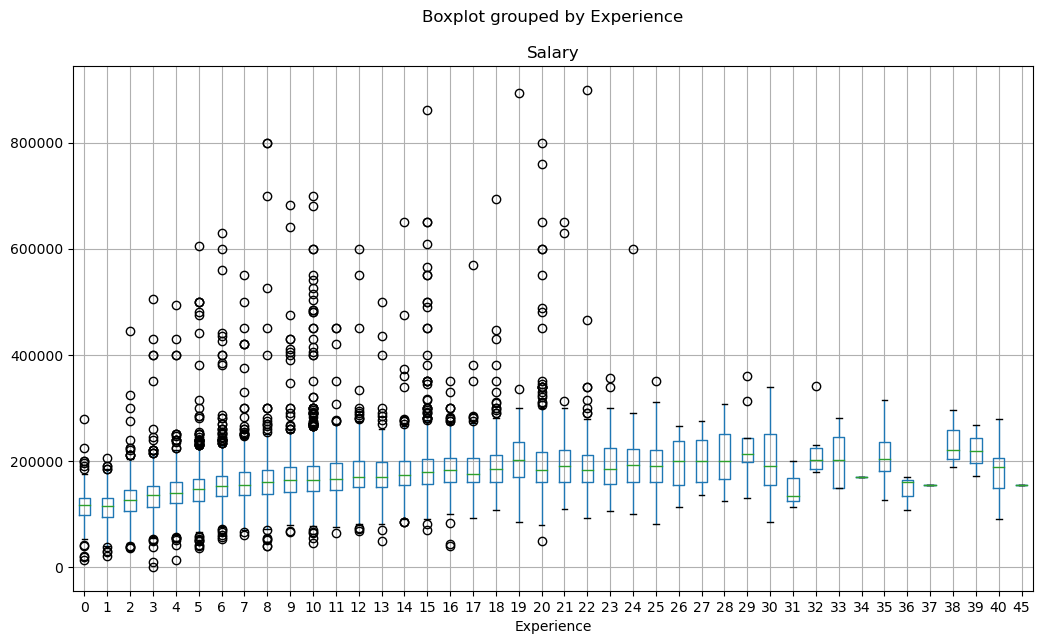

In [9]:
fig, ax= plt.subplots(1,1, figsize=(12, 7))
us.boxplot('Salary', 'Experience', ax=ax)

In [7]:
calculateSalary()

interactive(children=(Dropdown(description='Job', options=('Business Analyst', 'Data Scientist', 'Hardware Eng…

Button(description='Calculate', style=ButtonStyle())

Output()

interactive(children=(Checkbox(value=False, description='Refresh Plots'), Output()), _dom_classes=('widget-int…